#회귀분석(Regression Analysis) - 수치예측

In [50]:
import warnings
warnings.filterwarnings('ignore')

#실습용 데이터 설정
* seaborn 'mpg' Data Set

In [51]:
import seaborn as sns

DF = sns.load_dataset('mpg') 

* 자동차 연비(mpg) 데이터
  * mpg : miles per gallon
  * 1 mile : 1.6 Km
  * 1 gallon : 3.78 Liter

  
* pandas DataFrame

In [52]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [53]:
DF.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite


# I. Simple Linear Regression
   * First-Order Function



> # 1) 분석 변수 선택



In [54]:
DF1 = DF[['mpg', 'cylinders', 'displacement','weight']]

DF1.head(3)

,mpg,cylinders,displacement,weight
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436


> # 2)상관관계 그래프

* matplotlib

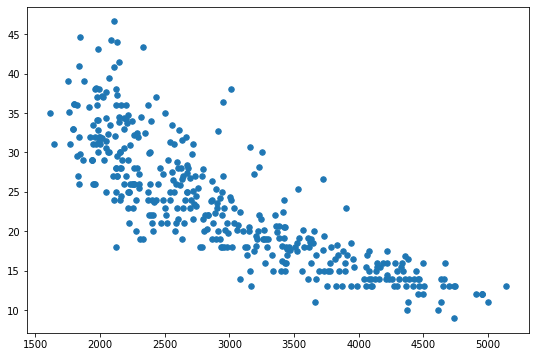

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize = (9, 6))
plt.scatter(x = DF1.weight, y = DF1.mpg, s= 30) # scatterplot 으로 weight 과 mpg의 그래프를 확인
plt.show()

* seaborn

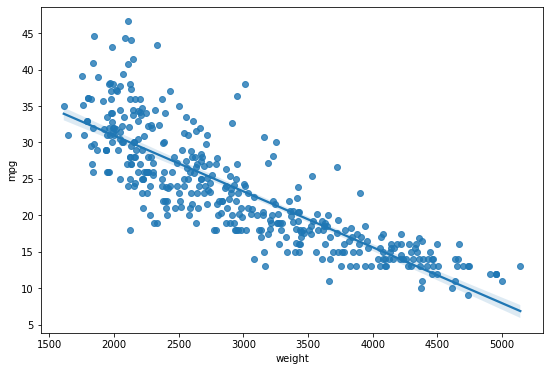

In [56]:
fig = plt.figure(figsize = (9, 6))
sns.regplot(x ='weight', y = 'mpg', data = DF1, fit_reg = fig) # 회귀선을 그어서 평균 보기
plt.show()


* pairplot

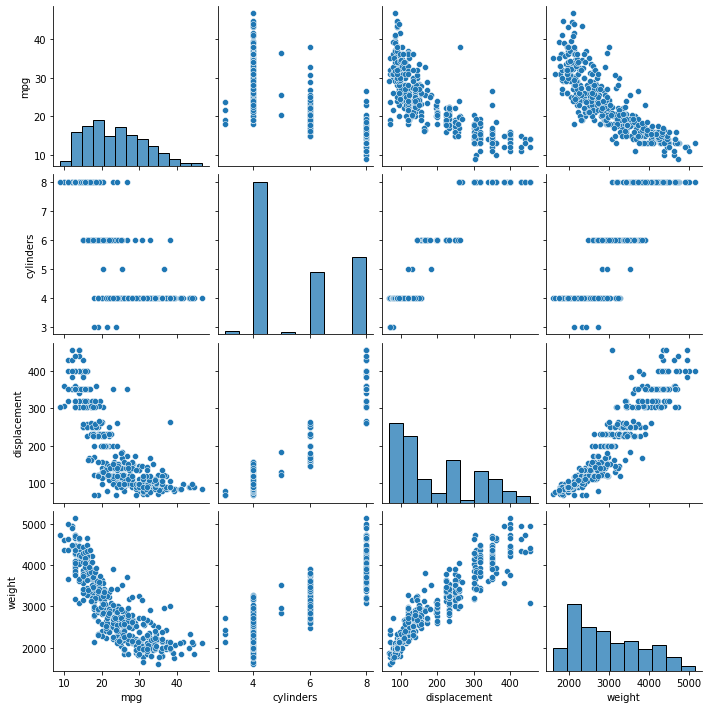

In [57]:
sns.pairplot(DF1)
plt.show()

> # 3) 상관계수(Correlation Coefficient)
* Pearson`s r

* mpg vs weight

In [58]:
from scipy import stats

stats.pearsonr(DF1.mpg, DF1.weight)[0] # 피어슨 상관계수 mpg와 weight 사이 관계 확인 

-0.831740933244335

* mpg vs. displacement

In [59]:
from scipy import stats

stats.pearsonr(DF1.mpg, DF1.displacement)[0] # 피어슨 상관계수 mpg와 displacement 사이 관계 확인 

-0.8042028248058978

* mpg vs. cylinders

In [60]:
from scipy import stats

stats.pearsonr(DF1.mpg, DF1.cylinders)[0] # 피어슨 상관계수 mpg와 cylinders 사이 관계 확인 

-0.7753962854205542

> # 4) train_test_split( )
 * 7:3

In [61]:
from sklearn.model_selection import train_test_split

X = DF1[['weight']]
y = DF1[['mpg']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state=2045)    # train_test_split를 이용하여 train : 70%, test : 30% 로 나눔
print('Train Data : ',X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (278, 1) (278, 1)
Test Data :  (120, 1) (120, 1)


> # 5) 선형회귀 Modeling
* 모델 생성

In [62]:
from sklearn.linear_model import LinearRegression

RA = LinearRegression()   #선형 회귀 모델 생성
RA.fit(X_train, y_train)  # 선형 회구 모델에 X_train, y_train을 학습

LinearRegression()

* Weight 및 Bias

In [63]:
print('weight(w) : ', RA.coef_)   # RA의 절편
print('bias(b) : ', RA.intercept_)  # RA의 기울기

weight(w) :  [[-0.0076616779]]
bias(b) :  [46.2822363909]


* 결정계수(R-Sqaure)

In [64]:
RA.score(X_test, y_test) # 예측 결정 계수를 확인

0.7164499678296495

> # 6) 모델 평가
* Mean Squared Error

In [65]:
from sklearn.metrics import mean_squared_error

y_hat = RA.predict(X_test)    # X_test의 예측값을 y_hat에 대입

mean_squared_error(y_test, y_hat) # y_test의 값을 y_hat의 예측값으로 MSE 측정

17.01518447782976

> # 7) Visualization
* y vs. y_hat

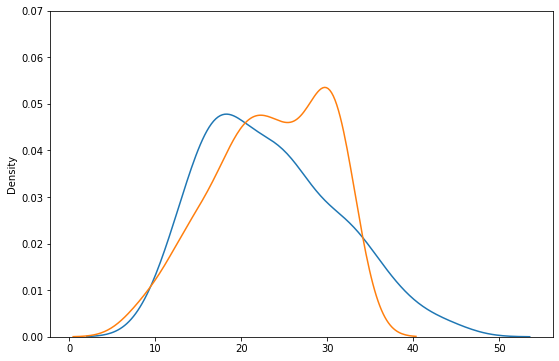

In [66]:
y_hat1 = RA.predict(X_test)

plt.figure(figsize = (9, 6))
ax1 = sns.distplot(y_test, hist = False, label = 'y')
ax2 = sns.distplot(y_hat1, hist = False, label = 'y_hat1', ax = ax1)
plt.ylim(0, 0.07)
plt.show()

# II. Linear Regression

* High-Order Function

> # 1) 분석 변수 선택

In [67]:
DF2 = DF[['mpg','cylinders','horsepower','weight']]

DF2.head(3)

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436


> # 2) train_test_split( )

* 7:3

In [68]:
from sklearn.model_selection import train_test_split

X = DF2[['weight']]
y = DF2[['mpg']]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=2045)  # train_test_split으로 X_train, y_train : 70%, X_test, y_test : 30%로 나눔

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (278, 1) (278, 1)
Test Data :  (120, 1) (120, 1)


> # 3) 선형회귀 Modeling
* 2차 다항식 변환

In [69]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2, include_bias = False) # 다항식 변환 2차항 변환 준비과정
X_train_poly = poly.fit_transform(X_train)                  # X_train을 2차항으로 데이터 변환하여 학습준비

print('변환 전 데이터 : ', X_train.shape)
print('2차항 변환 후 데이터 : ', X_train_poly.shape)

변환 전 데이터 :  (278, 1)
2차항 변환 후 데이터 :  (278, 2)


* High-Order 모델 생성

In [70]:
from sklearn.linear_model import LinearRegression

NL = LinearRegression()         # NL 선형회귀 모델 생성
NL.fit(X_train_poly, y_train)   # NL 에 2차항 데이터 변환해놓은 X_train_poly(2)와 y_train(1)을 학습

LinearRegression()

* |Weight 및 Bias

In [71]:
import numpy as np

np.set_printoptions(suppress = True, precision = 10)

print('weight(w) : ',NL.coef_)                # 학습된 NL의 절편
print('bias(b) : ', '%.8f' % NL.intercept_)   # 학습된 NL의 기울기

weight(w) :  [[-0.0175042457  0.0000015338]]
bias(b) :  60.88867527


* 결정계수(R-Sqaure)|

In [72]:
X_test_poly = poly.fit_transform(X_test)  #

NL.score(X_test_poly, y_test)             # NL에 X_test의 1차항 데이터 변환한 값과 y_test의 값을 예측 계수 호가인

0.7525521808321769

> # 4) 모델 평가
 * Mean Squared Error

In [73]:
from sklearn.metrics import mean_squared_error

X_test_poly = poly.fit_transform(X_test)        # X_test를 다항 변환 준비

mean_squared_error(y_test, NL.predict(X_test_poly)) # y_test와 NL의 X_test_poly(다항변환해놓은데이터)를 MSE 측정

14.848773810921921

> # 5) Visualization
* High-Order Model

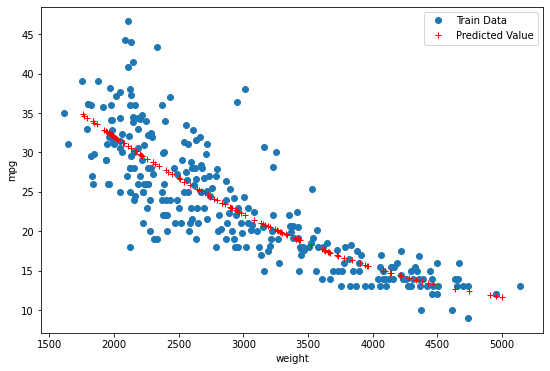

In [74]:
y_hat_test = NL.predict(X_test_poly)

plt.figure(figsize = (9, 6))
plt.plot(X_train, y_train, 'o', label = 'Train Data')
plt.plot(X_test, y_hat_test, 'r+', label = 'Predicted Value')
plt.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

* y vs. y_hat

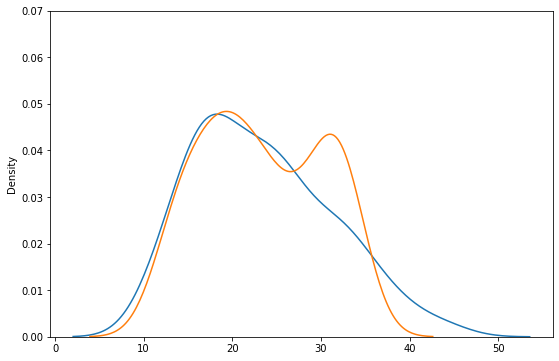

In [75]:
X_poly = poly.fit_transform(X_test)
y_hat2 = NL.predict(X_poly)

plt.figure(figsize = (9, 6))
ax1 = sns.distplot(y_test, hist=False, label='y')
ax2 = sns.distplot(y_hat2, hist=False, label='y_hat', ax=ax1)
plt.ylim(0, 0.07)
plt.show()


> # III. Multivariate Regression

* 1) 분석 변수 선택

In [39]:
DF3 = DF[['mpg','cylinders','displacement','weight']]

DF3.head(3)

,mpg,cylinders,displacement,weight
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436


> # 2) train_test_split()

* 7:3

In [40]:
from sklearn.model_selection import train_test_split

X = DF3[['displacement','weight']]
y = DF3['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (278, 2) (278,)
Test Data :  (120, 2) (120,)


> # 3) 다중회귀 Modeling
* 모델 생성

In [41]:
from sklearn.linear_model import LinearRegression

MR = LinearRegression()
MR.fit(X_train, y_train)

LinearRegression()

* Weight 및 Bias

In [42]:
print('weight(w) : ', MR.coef_)
print('bias(b) : ', MR.intercept_)

weight(w) :  [-0.0176653275 -0.0056727314]
bias(b) :  43.746522368983236


* 결정계수(R-Sqaure)

In [43]:
MR.score(X_test, y_test)

0.720971246285159

> # 4) 모델 평가
* Mean Squared Error

In [44]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, MR.predict(X_test))

16.743872969214195

> # 5) Visualization

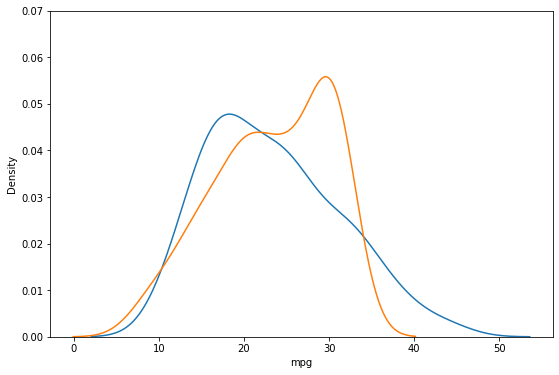

In [45]:
y_hat3 = MR.predict(X_test)

plt.figure(figsize=(9, 6))
ax1 = sns.distplot(y_test, hist=False, label='y_test')
ax2 = sns.distplot(y_hat3, hist=False, label='y_hat', ax= ax1)
plt.ylim(0, 0.07)
plt.show()

#IV. 최종 시각화

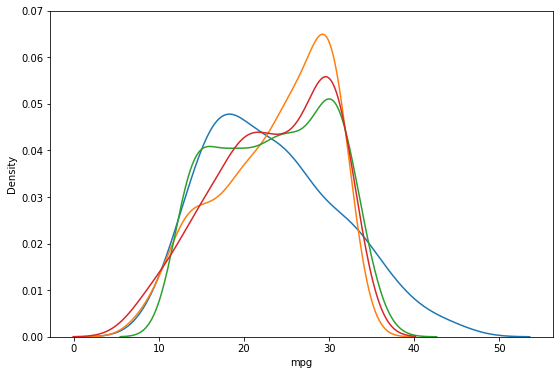

In [46]:
y_hat3 = MR.predict(X_test)

plt.figure(figsize=(9, 6))
ax1 = sns.distplot(y_test, hist = False, label='y_test')
ax2 = sns.distplot(y_hat1, hist = False, label='y_hat', ax = ax1)
ax3 = sns.distplot(y_hat2, hist = False, label='y_hat', ax = ax1)
ax4 = sns.distplot(y_hat3, hist = False, label='y_hat', ax = ax1)
plt.ylim(0, 0.07)
plt.show()